In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import SparsePCA

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import ward, dendrogram, linkage

from sklearn import metrics

In [3]:
def cluster_metric(data, true_labels, cluster_labels):
    print()
    print("Cluster Metric:")
    print("Homogeneity: ", metrics.homogeneity_score(true_labels, cluster_labels))
    print("Completeness: ", metrics.completeness_score(true_labels, cluster_labels))
    print("V-Measure: ", metrics.v_measure_score(true_labels, cluster_labels))
    print("Silhouette Score: ", metrics.silhouette_score(data, cluster_labels, metric='euclidean'))
    print()

In [4]:
def visualize_k_means(data, k_means):
    plt.figure(figsize=(8,6), dpi=120)
    k = len(k_means.cluster_centers_)
    for i in range(k):
        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        points_in_cluster = np.array([data[j] for j in range(len(data)) if k_means.labels_[j] == i])
        plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], \
                    marker='.', color=colors[i % len(colors)])
    plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 1], marker='*', color='k')
    plt.title('k-Means Clustering with k={} clusters'.format(k))
    plt.show()

In [12]:
def visualize_dbscan_clusters(data, dbscan):
    scaler = StandardScaler()
    xy = scaler.fit_transform(data)
    num_noisy_points = num_noisy_points = np.count_nonzero(dbscan.labels_ == -1)
    
    plt.figure(figsize=(8,6), dpi=120)
    for i in range(0, len(xy)):
        if dbscan.labels_[i] == 0:
            c1 = plt.scatter(xy[i, 0], xy[i, 1], c='r', marker='+')
        elif dbscan.labels_[i] == 1:
            c2 = plt.scatter(xy[i, 0], xy[i, 1], c='g', marker='o')
        elif dbscan.labels_[i] == 2:
            c3 = plt.scatter(xy[i, 0], xy[i, 1], c='y', marker='x')
        elif dbscan.labels_[i] == -1:
            c4 = plt.scatter(xy[i, 0], xy[i, 1] ,c='b', marker='*')
        
    plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Noise'])
    plt.title('Clustering with k={} clusters and {} noisy points (*)'.format(3, num_noisy_points))
    plt.show()

#### Clustering mit Hilfe der vorhandenen Texte

http://scikit-learn.org/stable/auto_examples/text/document_clustering.html#sphx-glr-auto-examples-text-document-clustering-py

http://brandonrose.org/clustering

In [6]:
csv = pd.read_csv("../Data/Biral_Products_csv.csv", delimiter=",", header=0)
labels = csv.Gruppenbezeichnung
data = np.array(csv)
print(data.shape)

(222, 19)


In [7]:
stemmer = SnowballStemmer("german")
stopwords = nltk.corpus.stopwords.words('german')
def tokenize_and_stem_and_remove_stopwords(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [8]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem_and_remove_stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(data[:,0] + " " + data[:,3])
print(tfidf_matrix.shape)
print(tfidf_vectorizer.get_feature_names())

(222, 111)
['/li', '/ul', '1x230v', '32f-12', '32f-6', '3x400v', 'a', 'ad', 'anlag', 'anwend', 'anwendungsbereich', 'aw', 'ax', 'axw', 'bestimmt', 'betriebspunkt', 'bewahrt', 'bg', 'bietet', 'biral-umwalzpump', 'blue', 'brauchwasserpump', 'burogebaud', 'bz', 'den', 'dien', 'eign', 'einfamilienhaus', 'eingeregelt', 'einrohr-', 'erst', 'exakt', 'flachenheiz', 'flanschanschluss', 'flussig', 'folgend', 'fordermengen.', 'fussbodenheiz', 'geeignet', 'generation', 'genug', 'gewindeanschluss', 'green', 'gross', 'heizungs-umwalzpump', 'heizungsanlag', 'hocheffizient', 'hotel', 'industri', 'industrieanlag', 'industriell', 'kaltwassersystem', 'kh', 'klein', 'klima-/kalte-anwend', 'klimaanlag', 'konstant', 'kuhlkreislauf', 'kw', 'leistungsklass', 'li', 'liegt', 'losung', 'lufterhitz', 'luftungs-', 'maximal', 'mediumstemperatur', 'mehrfamilienhaus', 'mittel', 'mittl', 'modula', 'modula-d', 'modula-pumpenfamili', 'mws', 'nahezu', 'nasslaufer-umwalzpump', 'passend', 'pn10/16', 'pn6', 'primax', 'pump'

In [9]:
k = 3
k_means = KMeans(n_clusters=k).fit(tfidf_matrix)
clusters = k_means.labels_.tolist()

print("Top terms per cluster:")
print()
terms = tfidf_vectorizer.get_feature_names()
order_centroids = k_means.cluster_centers_.argsort()[:, ::-1]
for i in range(k):
    print("Cluster {}".format(i))
    for ind in order_centroids[i, :10]:
        print(terms[ind])
    print()
    
cluster_metric(tfidf_matrix, labels, k_means.labels_)

Top terms per cluster:

Cluster 0
hocheffizient
blue
zuverlass
bewahrt
trinkwarmwass
zirkulationssystem
erst
generation
dien
verrichtet

Cluster 1
luftungs-
green
wohnhaus
industri
warmepump
kuhlkreislauf
klimaanlag
anlag
li
/li

Cluster 2
anwendungsbereich
nahezu
bietet
leistungsklass
klima-/kalte-anwend
passend
losung
modula-pumpenfamili
heizungs-umwalzpump
red


Cluster Metric:
Homogeneity:  0.5931338279180717
Completeness:  0.529532963379656
V-Measure:  0.559531850434652
Silhouette Score:  0.35375163836098067



(222, 2)

Cluster Metric:
Homogeneity:  0.582515717304665
Completeness:  0.5733133485190932
V-Measure:  0.5778778996441366
Silhouette Score:  0.9577126016457719



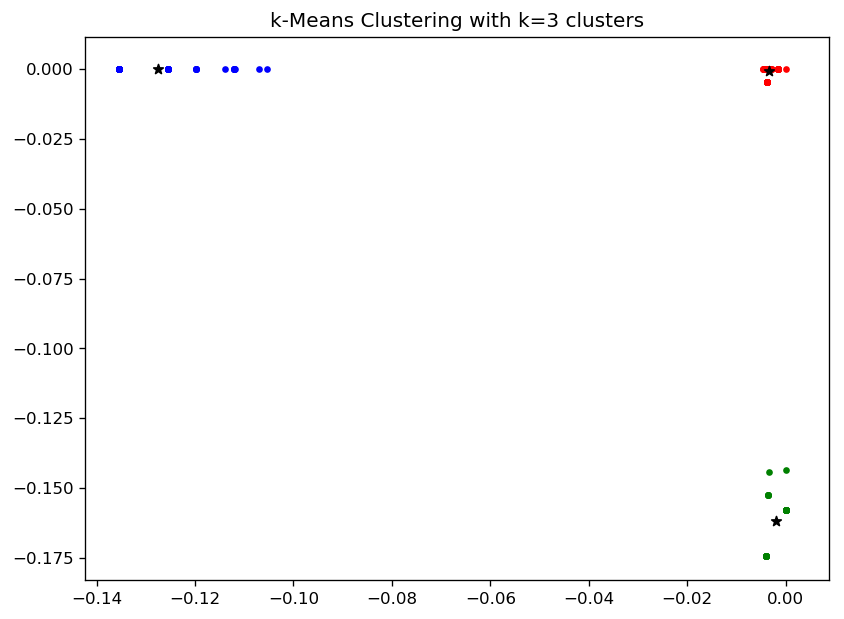

In [13]:
pca = SparsePCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())
print(tfidf_matrix_pca.shape)

k = 3
k_means = KMeans(n_clusters=k).fit(tfidf_matrix_pca)
cluster_metric(tfidf_matrix_pca, labels, k_means.labels_)
visualize_k_means(tfidf_matrix_pca, k_means)


Cluster Metric:
Homogeneity:  0.8098525846014152
Completeness:  0.5854723817243537
V-Measure:  0.6796213541577446
Silhouette Score:  0.5111131731726393

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2]


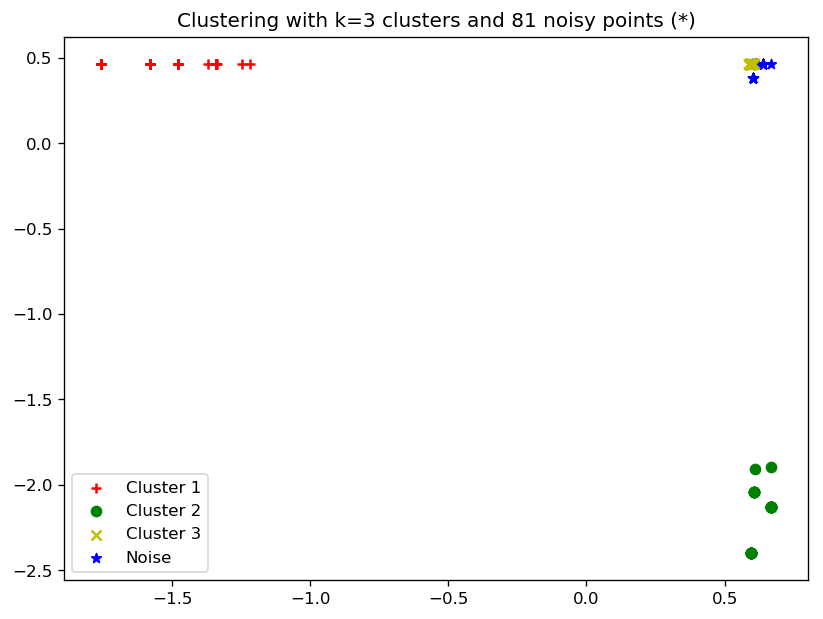

In [36]:
db_scan = DBSCAN(eps=0.9, min_samples=30, metric='euclidean').fit(tfidf_matrix)
cluster_metric(tfidf_matrix_pca, labels, db_scan.labels_)
print(db_scan.labels_)

visualize_dbscan_clusters(tfidf_matrix_pca, db_scan)

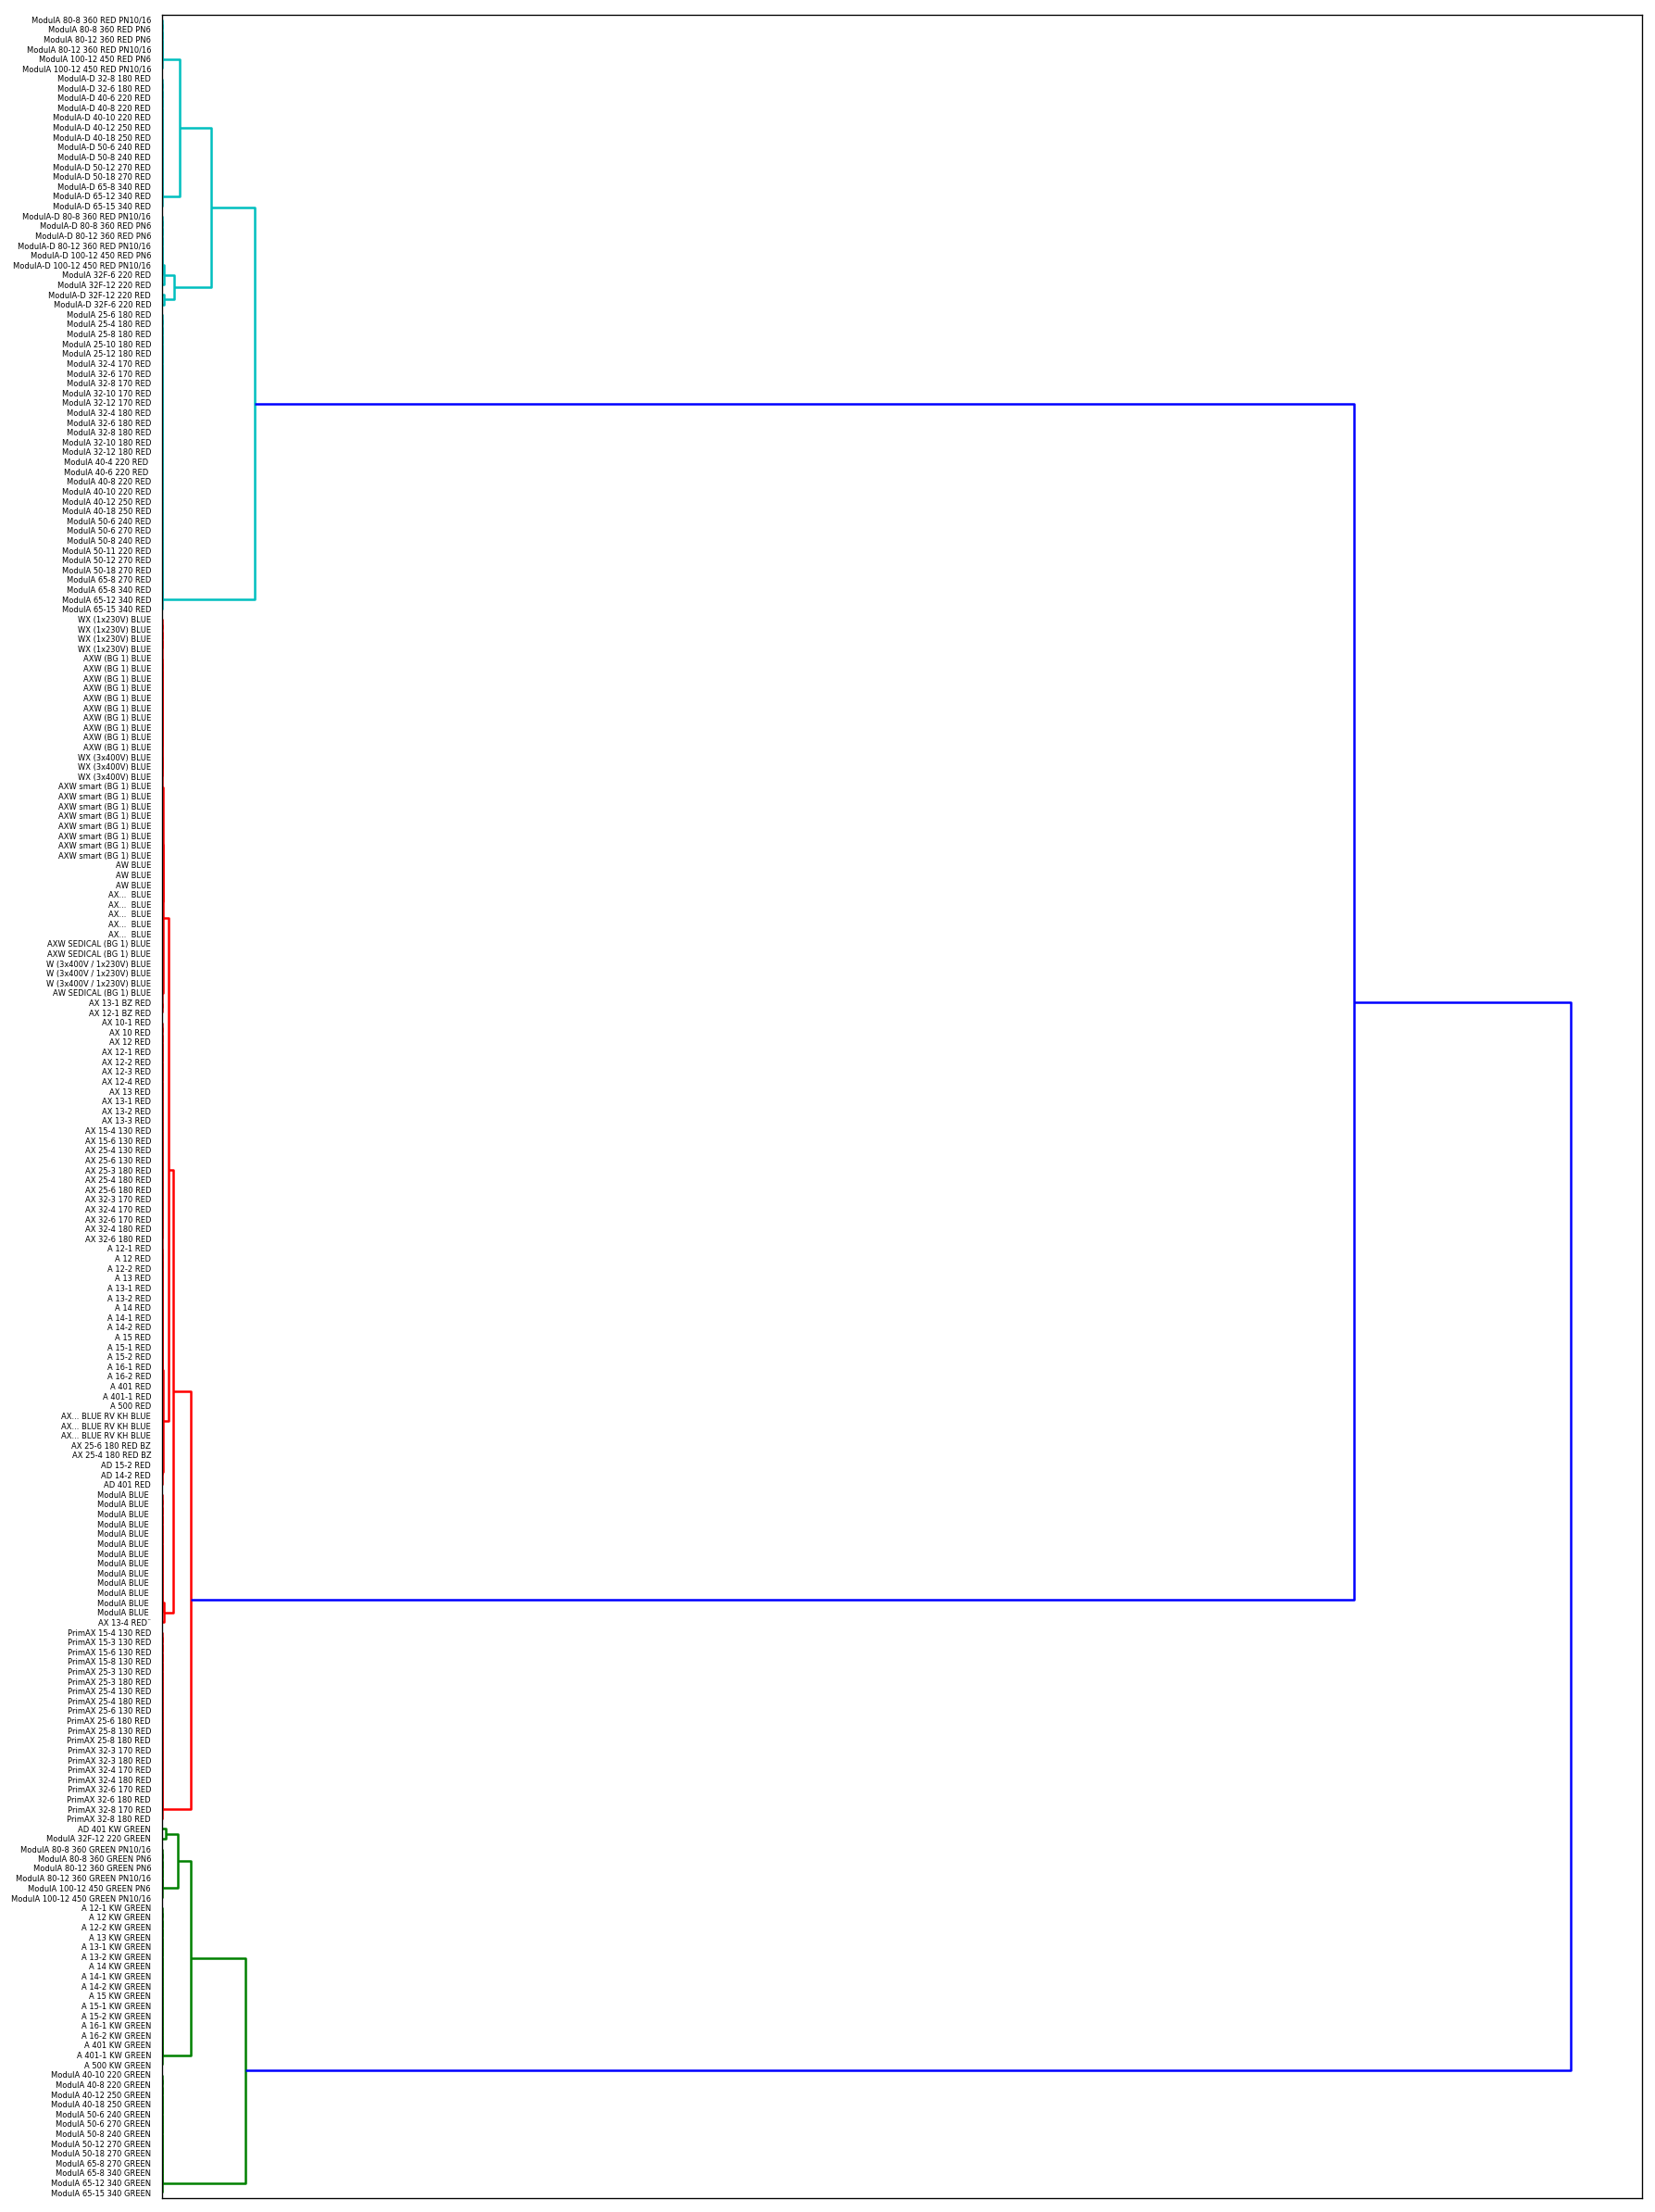

In [47]:
data_dist = pdist(tfidf_matrix_pca, metric="euclidean")
linkage_matrix = linkage(data_dist, method="ward", metric="euclidean")

fig, ax = plt.subplots(figsize=(15, 20), dpi=120)
ax = dendrogram(linkage_matrix, orientation="right", labels=data[:,0]);

plt.tick_params(\
    axis= 'x',          
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off')

plt.tight_layout()

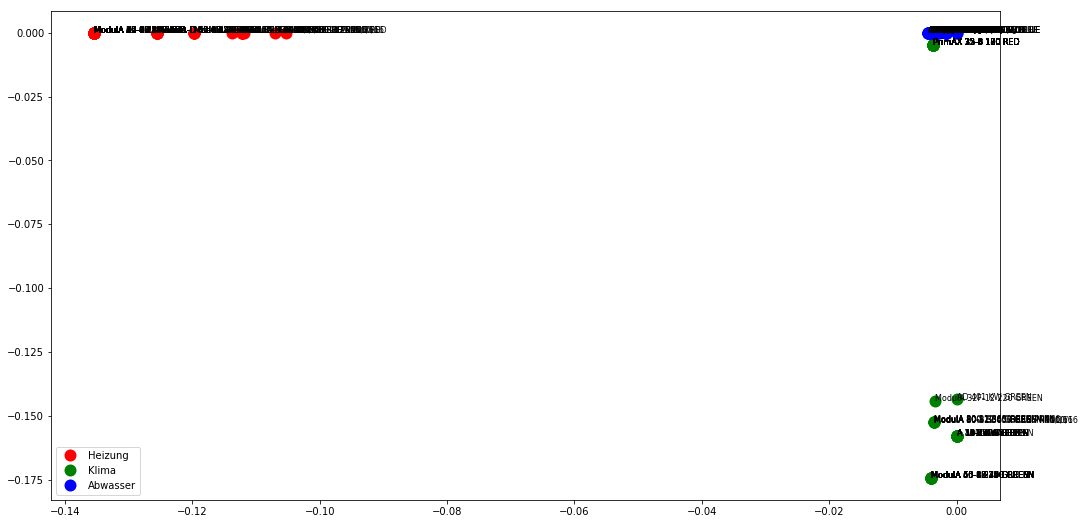

In [126]:
cluster_colors = {0: "red", 1: "green", 2: "blue"}
cluster_labels = {0: "Heizung", 1: "Klima", 2: "Abwasser"}

df = pd.DataFrame(dict(x=tfidf_matrix_pca[:,0], y=tfidf_matrix_pca[:,1], label=clusters, title=data[:,0]))
groups = df.groupby("label")

figure, ax = plt.subplots(figsize=(17, 9))
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_labels[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both')      # both major and minor ticks are affected
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both')      # both major and minor ticks are affected
    
ax.legend(numpoints=1)
for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)  

plt.show()
plt.close()